#### Import modules and Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Description of each variable

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [2]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


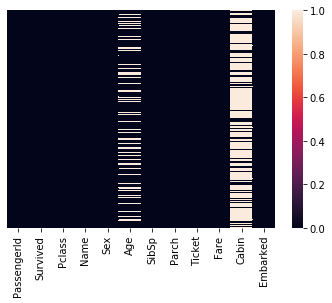

In [3]:
sns.heatmap(titanic.isnull(), yticklabels=False)

There are overall 177 missing Age values, 2 missing Embarked, and 687 NAs in Cabin variable.

## Exploring the data

#### Survivals 

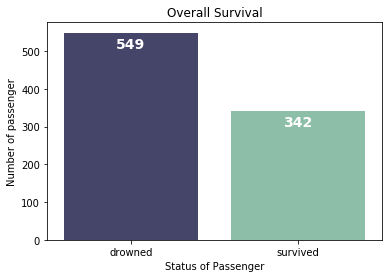

In [4]:

ax =sns.countplot(titanic['Survived'],palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.title('Overall Survival')
plt.xticks(np.arange(2), ['drowned', 'survived'])
plt.xlabel('Status of Passenger')
plt.ylabel('Number of passenger')

# calculate passengers for each category
labels = titanic['Survived'].value_counts()
for i,v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

In [5]:
titanic['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

We have 891 passengers in train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived.

#### Age

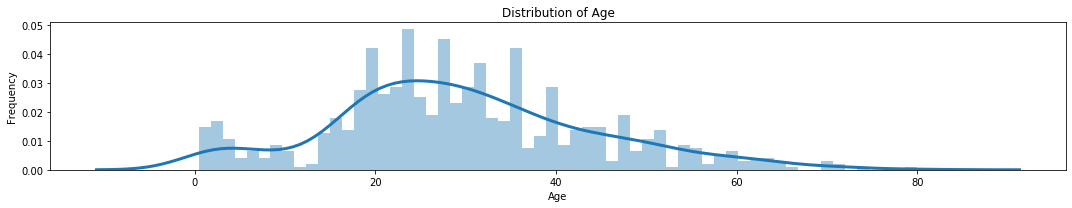

In [6]:
plt.figure(figsize = (15,3))
sns.distplot(titanic[titanic['Age']>0]['Age'],kde_kws={"lw":3}, bins = 60)

plt.title('Distribution of Age')
plt.ylabel('Frequency');
plt.tight_layout()

In [10]:
des = pd.DataFrame(titanic['Age'].describe())
des.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


The Age vary from about 0.42 year to 80 years with mean = 29.88

#### Age with Surviving Status

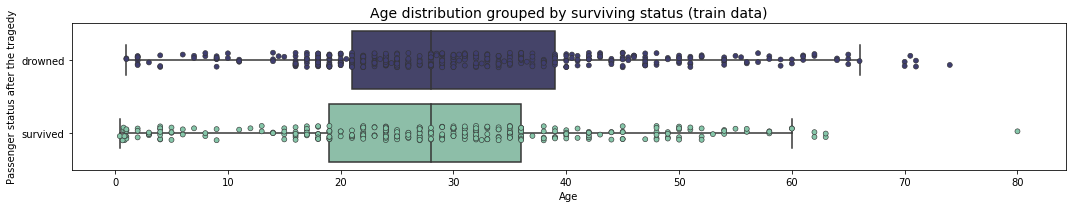

In [36]:
plt.figure(figsize=(15, 3))

sns.boxplot(y = 'Survived', x = 'Age', data = titanic,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

sns.stripplot(y = 'Survived', x = 'Age', data = titanic,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

In [16]:
titanic.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


The mean age of Survived and drowned passengers are 28.0 

#### Age by Class

In [39]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


1st class has wider distribution compare to 2nd and 3rd and almost symmetric.
Both 2nd and 3rd classes age distributions are right skewed.
The youngest passenger has 3rd class ticket, age = 0.42.
The oldest passenger has 1st class ticket, age = 80.
3rd class mean age = 25, 2nd classe average age is 29 and 1st class average age is 38.

#### Age vs Class vs Gender

Filter data for each category:

In [59]:
age_1_class = titanic[(titanic["Age"] > 0) & 
                              (titanic["Pclass"] == 1)]
age_2_class = titanic[(titanic["Age"] > 0) & 
                              (titanic["Pclass"] == 2)]
age_3_class = titanic[(titanic["Age"] > 0) & (titanic["Pclass"] == 3)]

(-5, 80)

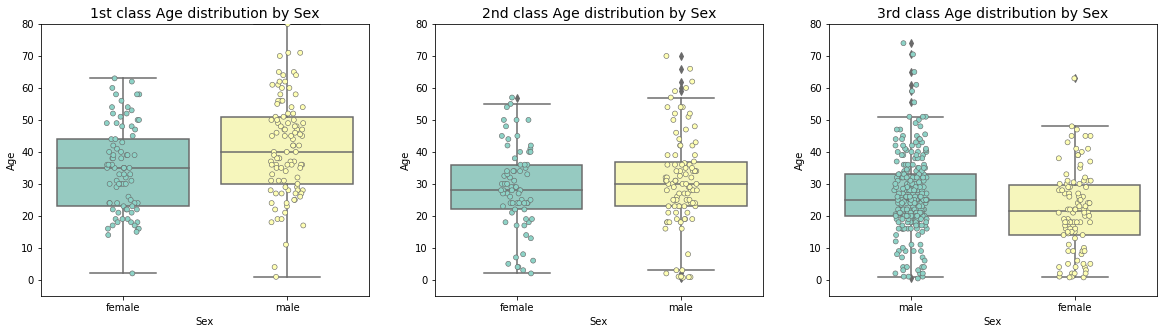

In [67]:
plt.figure(figsize=(20, 5))
palette = "Set3"
plt.subplot(1,3,1)
sns.boxplot(y = 'Age', x = 'Sex', data = age_1_class, palette=palette)
sns.stripplot(x = 'Sex', y='Age', data = age_1_class, linewidth=0.6, palette=palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)


plt.subplot(1,3,2)
sns.boxplot(y = 'Age', x = 'Sex', data = age_2_class, palette=palette)
sns.stripplot(x = 'Sex', y='Age', data = age_2_class, linewidth=0.6, palette=palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)


plt.subplot(1,3,3)
sns.boxplot(y = 'Age', x = 'Sex', data = age_3_class, palette=palette)
sns.stripplot(x = 'Sex', y='Age', data = age_3_class, linewidth=0.6, palette=palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)



In [78]:
age1=pd.DataFrame(age_1_class.groupby('Sex')['Age'].describe())
age2=pd.DataFrame(age_2_class.groupby('Sex')['Age'].describe())
age3=pd.DataFrame(age_3_class.groupby('Sex')['Age'].describe())
pd.concat([age1,age2,age3],axis=0,sort=False,keys=['1st','2nd','3rd'])


count       mean        std   min     25%   50%    75%   max
    Sex                                                                 
1st female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
    male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2nd female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
    male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3rd female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
    male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In each class the average Age of female are slightly less than the average Age of male passengers.

### Family

calculate the family size, by summarizing the number of siblings with the parch number plus 1 (passenger himself).


Family size = sib + parch + 1

In [93]:
titanic['FamilySize'] = titanic['SibSp']+titanic['Parch']+1
print('Family Size and Number of Passengers')
titanic['FamilySize'].value_counts()

Family Size and Number of Passengers


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

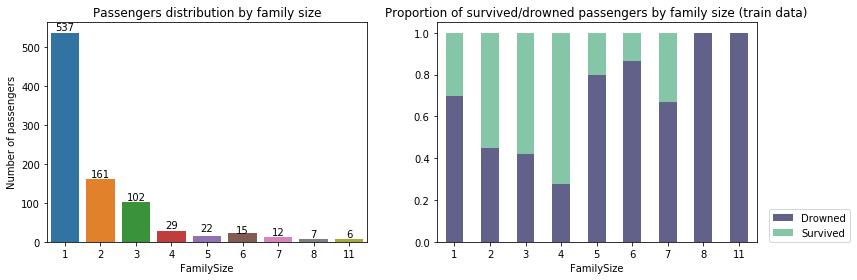

In [96]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax = sns.countplot(titanic['FamilySize'], ax = ax1)

# calculate passengers for each category
labels = (titanic['FamilySize'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = titanic.groupby('FamilySize')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

* There were two large families with sizes 8 and 11 and all their members from the training dataset are drowned.
* Most of the passengers were traveling alone, percent of survivals not very large.
* The biggest proportion of survived passengers in group of people who had 4 family members on board.

### Class
#### Passengers by Class


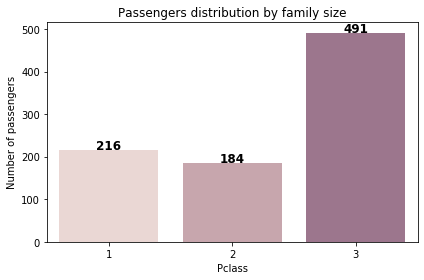

In [109]:
ax = sns.countplot(titanic['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (titanic['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

### Class vs Surviving Status

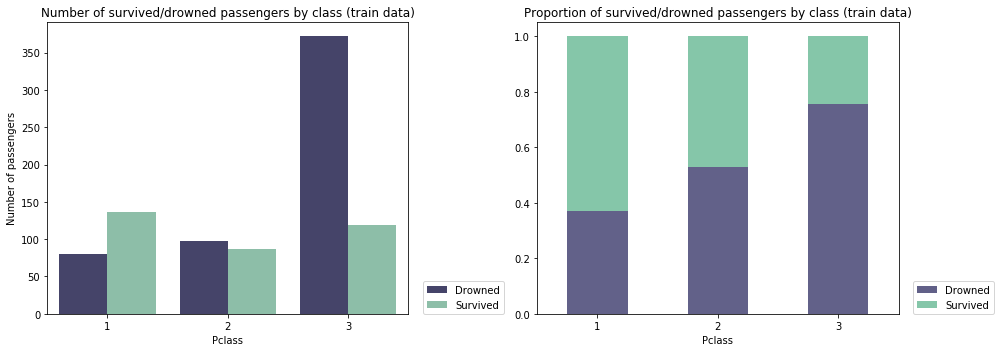

In [112]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = titanic.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

The first class has the largest number of survivors and the proportion of survivors within the class is the largest.Third-class tickets had the highest number of drowned passengers.

### Class vs Surviving status vs Gender

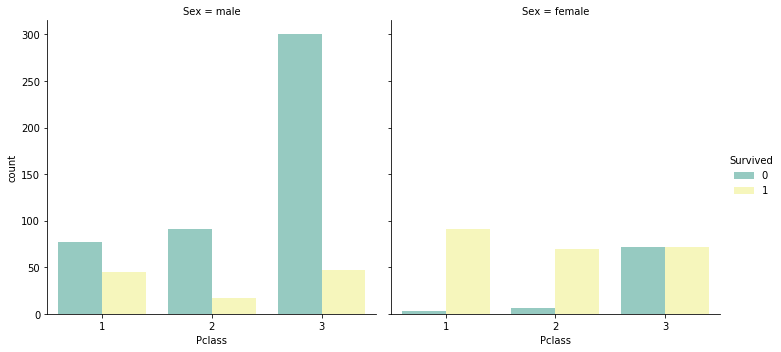

In [124]:
sns.catplot(x='Pclass',hue='Survived',col='Sex', kind='count',data=titanic, palette=palette)